In [1]:
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
test_path = 'chest_xray/test'
valid_path = 'chest_xray/val'

In [2]:
train_path

'chest_xray/train'

In [3]:
#!pip install tensorflow

In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
from keras.layers import Input, Lambda, Dense, Flatten

In [7]:
from keras.models import Model

In [8]:
from keras.applications.vgg16 import VGG16

In [9]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
for layer in vgg.layers:
    layer.trainable = False

In [11]:
from glob import glob

In [12]:
folders = glob('chest_xray/train/*')
x = Flatten()(vgg.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │          75,267 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 6216 images belonging to 3 classes.
Found 1608 images belonging to 3 classes.
Found 16 images belonging to 2 classes.


In [17]:
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [18]:
r = model.fit(
   training_set,
   validation_data=test_set,
   epochs=1,
   steps_per_epoch=len(training_set),
   validation_steps=len(test_set)
)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


622/622 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9089 - loss: 0.2458

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000028823CEB880>
Traceback (most recent call last):

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 247, in _finite_generator
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\PIL\Image.py", line 3309, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000028823CEB880>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_10622]

In [ ]:
# Function to classify image and detect invalid inputs
def classify_image(img_path, threshold=0.7):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    plt.imshow(img_array.astype('uint8'))
    plt.axis('off')  # This hides the axes
    plt.show()
    
    img_array = np.expand_dims(img_array, axis=0)
    img_data = preprocess_input(img_array)
    
    # Get predictions
    predictions = model.predict(img_data)
    confidence = np.max(predictions)  # Highest probability
    class_index = np.argmax(predictions, axis=1)[0]
    
    # Get class labels
    class_labels = list(training_set.class_indices.keys())
    result = class_labels[class_index]
    
    # If confidence is low, classify as "Invalid Input"
    if confidence < threshold:
        print("❌ Invalid Input: Please provide a valid chest X-ray image.")
    else:
        print(f"✅ Classification Result: {result} (Confidence: {confidence:.2f})")

# Test with an image
classify_image('chest_xray/person100_bacteria_481.jpeg')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_set, steps=len(test_set))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
model.save('chest_xray.keras')

In [ ]:
img=image.load_img('chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg',target_size=(224,224))

In [ ]:
img_array = np.array(img)

In [ ]:
plt.imshow(img_array)
plt.axis('off')  # This hides the axes
plt.show()

In [ ]:
x=image.img_to_array(img)

In [ ]:
x=np.expand_dims(x, axis=0)

In [ ]:
img_data=preprocess_input(x)

In [ ]:
classes=model.predict(img_data)


In [ ]:
# Get predictions
predicted_class = np.argmax(classes[0])  # Get the index of the highest probability

# Map the predicted index to class names
class_labels = training_set.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())  # Flip the keys and values
predicted_label = class_labels[predicted_class]

# Display result
if predicted_label == 'PNEUMONIA':
    print("Person is Affected By PNEUMONIA")
elif predicted_label == 'NORMAL':
    print("Result is Normal")
else:
    print("Invalid Input")


In [ ]:
confidence

In [ ]:
#result=int(classes[0][0])

In [ ]:
#if result==0:
 #   print("Person is Affected By PNEUMONIA")
#else:
 #   print("Result is Normal")

In [19]:
IMAGE_SIZE = [224, 224]

train_path = 'chest_xray/train'
test_path = 'chest_xray/test'

# Install TensorFlow if not already installed
!pip install tensorflow

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

# Get the number of classes
folders = glob('chest_xray/train/*')

# Flatten and add output layer
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

# Create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# View the structure of the model
model.summary()

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Training and validation datasets
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

# Train the model
r = model.fit(
   training_set,
   validation_data=test_set,
   epochs=1,
   steps_per_epoch=len(training_set),
   validation_steps=len(test_set)
)




Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │          75,267 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,789,955 (56.42 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 6216 images belonging to 3 classes.
Found 1608 images belonging to 3 classes.
622/622 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9025 - loss: 0.2730

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000028845AC2CA0>
Traceback (most recent call last):

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 247, in _finite_generator
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py", line 236, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\Users\DELL\anaconda3\Lib\site-packages\PIL\Image.py", line 3309, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x0000028845AC2CA0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_21318]

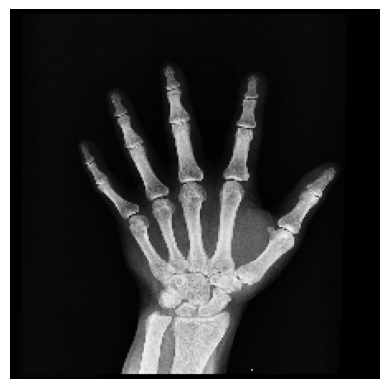

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
✅ Classification Result: INVALID (Confidence: 1.00)


In [27]:
# Save the model
model.save('chest_xray.keras')

# Function to classify image and detect invalid inputs
def classify_image(img_path, threshold=0.7):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    plt.imshow(img_array.astype('uint8'))
    plt.axis('off')  # This hides the axes
    plt.show()
    
    img_array = np.expand_dims(img_array, axis=0)
    img_data = preprocess_input(img_array)
    
    # Get predictions
    predictions = model.predict(img_data)
    confidence = np.max(predictions)  # Highest probability
    class_index = np.argmax(predictions, axis=1)[0]
    
    # Get class labels
    class_labels = list(training_set.class_indices.keys())
    result = class_labels[class_index]
    
    # If confidence is low, classify as "Invalid Input"
    if confidence < threshold:
        print("❌ Invalid Input: Please provide a valid chest X-ray image.")
    else:
        print(f"✅ Classification Result: {result} (Confidence: {confidence:.2f})")

# Test with an image
classify_image('chest_xray/x-ray-1704855_1280.jpg')

In [32]:
model = tf.keras.models.load_model('chest_xray.keras')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpcq9w00b5\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpcq9w00b5\assets


Saved artifact at 'C:\Users\DELL\AppData\Local\Temp\tmpcq9w00b5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2784341858192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341858576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341858768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341859728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341859920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341860496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341860688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341861264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784338517200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2784341861840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  27843